In [1]:
#Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import StandardScaler

#Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn import svm
import xgboost as xgb

#Report
from sklearn.metrics import classification_report

#Validation
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_confusion_matrix

In [4]:
#Cargamos y leemos el csv

df1 = pd.read_csv("C:/Users/Daniel/Desktop/csv definitivos/Q3_tweets_24_notendencias_variables.csv", sep = ";")
df2 = pd.read_csv("C:/Users/Daniel/Desktop/csv definitivos/Q3_tweets_25_notendencias_variables.csv", sep = ";")
df3 = pd.read_csv("C:/Users/Daniel/Desktop/csv definitivos/Q1Q3_tweets_24_tendencias_variables.csv", sep = ";")
df4 = pd.read_csv("C:/Users/Daniel/Desktop/csv definitivos/Q1Q3_tweets_25_tendencias_variables.csv", sep = ";")

df1["target"] = 0
df2["target"] = 0
df3["target"] = 1
df4["target"] = 1

del(df1["Unnamed: 0"])
del(df2["Unnamed: 0"])
del(df3["Unnamed: 0"])
del(df4["Unnamed: 0"])

In [5]:
df_train = pd.concat([df1, df3])
df_test = pd.concat([df2, df4])

df_train.drop("start_lifetime", axis = 1, inplace = True)
df_test.drop("start_lifetime", axis = 1, inplace = True)

In [6]:
#Obtenemos train
X = np.asarray(df_train.iloc[:,2:-2])
y = np.asarray(df_train.target)

#Obtenemos test
X_test = df_test.iloc[:, 2:-2]
y_test = df_test.target

In [7]:
#Estandarizamos los datos
scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [8]:
df_metrics = pd.DataFrame(columns = ["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC"])

# RandomForestClassifier()

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 40.5min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 52.6min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 65.2min
[Parallel(n_jobs=-1)]: Done 2592 out of 2592 | elapsed: 65.4min finished


Accuracy_score: 0.8120229007633588
------------------------------------
Confusion Matrix:
 [[513 147]
 [ 50 338]]
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       660
           1       0.70      0.87      0.77       388

    accuracy                           0.81      1048
   macro avg       0.80      0.82      0.81      1048
weighted avg       0.83      0.81      0.82      1048



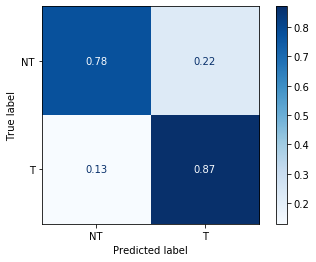

Area bajo la curva:  0.878305607622618


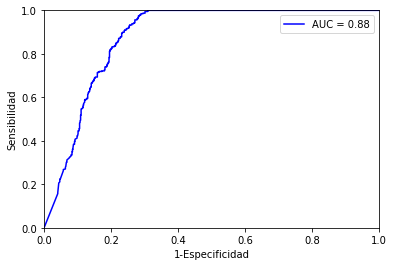

In [9]:
#Calculamos los mejores parametros para el modelo
clf = RandomForestClassifier()
clfparam_grid = {"bootstrap"         : [True, False],
                 "max_depth"         : [10, 20, 30, 40, 50, 60, 70, None],
                 "max_features"      : ["auto", "sqrt"],
                 "min_samples_leaf"  : [1, 2, 4],
                 "min_samples_split" : [2, 5, 10],
                 "n_estimators"      : [200, 400, 600]}

clf_search = GridSearchCV(clf, param_grid = clfparam_grid, cv = 3, verbose = 2, n_jobs = -1)
 
model_result = clf_search.fit(X, y)
best_model = model_result.best_estimator_
final_model = best_model.fit(X,y)
yhat = final_model.predict(X_test)

print("Accuracy_score:", accuracy_score(y_test, yhat))
print("------------------------------------")
print("Confusion Matrix:\n", confusion_matrix(y_test, yhat))
print("------------------------------------------------------")
print(classification_report(y_test, yhat))

probs = final_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

row = {"Model"     : "RandomForestClassifier",
       "Accuracy"  : round(accuracy_score(y_test, yhat), 3),
       "F1-Score"  : round(f1_score(y_test,yhat), 3),
       "Precision" : round(precision_score(y_test, yhat), 3),
       "Recall"    : round(recall_score(y_test, yhat), 3),
       "AUC"       : round(roc_auc, 3)}

df_metrics = pd.concat([df_metrics, pd.DataFrame(row, index = [0])])


# Confussion Matrix
disp = plot_confusion_matrix(final_model, X_test, y_test,
                             display_labels=["NT", "T"],
                             cmap = plt.cm.Blues,
                             normalize = "true")
plt.show()

# Curva ROC
probs = final_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, "b", label = "AUC = %0.2f" % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel("Sensibilidad")
plt.xlabel("1-Especificidad")
plt.show()

# LogisticRegression()

In [ ]:
#Calculamos los mejores parametros para el modelo
clf = LogisticRegression()
clfparam_grid = {"C"        : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                 "penalty"  : ["l1", "l2"],
                 "max_iter" : list(range(100,800,100)),
                 "solver"   : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}

clf_search = GridSearchCV(clf, param_grid = clfparam_grid, refit = True, verbose = 3, cv = 5)

print("Mean Accuracy: %.3f" % clf_search.best_score_)
print("Config: %s" % clf_search.best_params_)


model_result = clf_search.fit(X, y)
best_model = model_result.best_estimator_
final_model = best_model.fit(X,y)
yhat = final_model.predict(X_test)

print("Accuracy_score:", accuracy_score(y_test, yhat))
print("------------------------------------")
print("Confusion Matrix:\n", confusion_matrix(y_test, yhat))
print("------------------------------------------------------")
print(classification_report(y_test, yhat))

probs = final_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

row = {"Model"     : "LogisticRegression",
       "Accuracy"  : round(accuracy_score(y_test, yhat), 3),
       "F1-Score"  : round(f1_score(y_test,yhat), 3),
       "Precision" : round(precision_score(y_test, yhat), 3),
       "Recall"    : round(recall_score(y_test, yhat), 3),
       "AUC"       : round(roc_auc, 3)}

df_metrics = pd.concat([df_metrics, pd.DataFrame(row, index = [0])])


# Confussion Matrix
disp = plot_confusion_matrix(final_model, X_test, y_test,
                             display_labels=["NT", "T"],
                             cmap = plt.cm.Blues,
                             normalize = "true")
plt.show()

# Curva ROC
probs = final_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, "b", label = "AUC = %0.2f" % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel("Sensibilidad")
plt.xlabel("1-Especificidad")
plt.show()

# GaussianNB()

In [ ]:
#Calculamos los mejores parametros para el modelo
clf = GaussianNB()
clfparam_grid = {"var_smoothing" : np.logspace(0, -9, num = 100)}
clf_search = GridSearchCV(clf, param_grid = clfparam_grid, cv = 5, verbose = 1)


model_result = clf_search.fit(X, y)
best_model = model_result.best_estimator_
final_model = best_model.fit(X,y)
yhat = final_model.predict(X_test)

print("Accuracy_score:", accuracy_score(y_test, yhat))
print("------------------------------------")
print("Confusion Matrix:\n", confusion_matrix(y_test, yhat))
print("------------------------------------------------------")
print(classification_report(y_test, yhat))

probs = final_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

row = {"Model"     : "GaussianNB",
       "Accuracy"  : round(accuracy_score(y_test, yhat), 3),
       "F1-Score"  : round(f1_score(y_test,yhat), 3),
       "Precision" : round(precision_score(y_test, yhat), 3),
       "Recall"    : round(recall_score(y_test, yhat), 3),
       "AUC"       : round(roc_auc, 3)}

df_metrics = pd.concat([df_metrics, pd.DataFrame(row, index = [0])])


# Confussion Matrix
disp = plot_confusion_matrix(final_model, X_test, y_test,
                             display_labels=["NT", "T"],
                             cmap = plt.cm.Blues,
                             normalize = "true")
plt.show()

# Curva ROC
probs = final_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, "b", label = "AUC = %0.2f" % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel("Sensibilidad")
plt.xlabel("1 - Especificidad")
plt.show()

# KNeighborsClassifier()


In [ ]:
#Calculamos los mejores parametros para el modelo
clf = KNeighborsClassifier()
clfparam_grid = {"n_neighbors": [3,4,5,6,10],
                 "weights"    : ["uniform", "distance"],
                 "metric"     : ["euclidean", "manhattan"]}

clf_search = GridSearchCV(clf, param_grid = clfparam_grid, verbose = 1, cv = 3, n_jobs = -1 )

model_result = clf_search.fit(X, y)
best_model = model_result.best_estimator_
final_model = best_model.fit(X,y)
yhat = final_model.predict(X_test)

print("Accuracy_score:", accuracy_score(y_test, yhat))
print("------------------------------------")
print("Confusion Matrix:\n", confusion_matrix(y_test, yhat))
print("------------------------------------------------------")
print(classification_report(y_test, yhat))

probs = cfinal_modellf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

row = {"Model"     : "KNeighborsClassifier",
       "Accuracy"  : round(accuracy_score(y_test, yhat), 3),
       "F1-Score"  : round(f1_score(y_test,yhat), 3),
       "Precision" : round(precision_score(y_test, yhat), 3),
       "Recall"    : round(recall_score(y_test, yhat), 3),
       "AUC"       : round(roc_auc, 3)}

df_metrics = pd.concat([df_metrics, pd.DataFrame(row, index = [0])])


# Confussion Matrix
disp = plot_confusion_matrix(final_model, X_test, y_test,
                             display_labels=["NT", "T"],
                             cmap = plt.cm.Blues,
                             normalize = "true")
plt.show()

# Curva ROC
probs = final_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, "b", label = "AUC = %0.2f" % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel("Sensibilidad")
plt.xlabel("1-Especificidad")
plt.show()

# DecisionTreeClassifier()

In [ ]:
#Calculamos los mejores parametros para el modelo
clf = DecisionTreeClassifier()
clfparam_grid = {"criterion" : ["gini", "entropy"],
                 "max_depth" : [2,4,6,8,10,12]}

clf_search = GridSearchCV(clf, param_grid = clfparam_grid, refit = True, verbose = 3, cv=5)

 
model_result = clf_search.fit(X, y)
best_model = model_result.best_estimator_
final_model = best_model.fit(X,y)
yhat = final_model.predict(X_test)

print("Accuracy_score:", accuracy_score(y_test, yhat))
print("------------------------------------")
print("Confusion Matrix:\n", confusion_matrix(y_test, yhat))
print("------------------------------------------------------")
print(classification_report(y_test, yhat))

probs = final_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

row = {"Model"     : "DecisionTreeClassifier",
       "Accuracy"  : round(accuracy_score(y_test, yhat), 3),
       "F1-Score"  : round(f1_score(y_test,yhat), 3),
       "Precision" : round(precision_score(y_test, yhat), 3),
       "Recall"    : round(recall_score(y_test, yhat), 3),
       "AUC"       : round(roc_auc, 3)}

df_metrics = pd.concat([df_metrics, pd.DataFrame(row, index = [0])])

# Confussion Matrix
disp = plot_confusion_matrix(final_model, X_test, y_test,
                             display_labels=["NT", "T"],
                             cmap = plt.cm.Blues,
                             normalize = "true")
plt.show()

# Curva ROC
probs = final_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, "b", label = "AUC = %0.2f" % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel("Sensibilidad")
plt.xlabel("1-Especificidad")
plt.show()

# SVM

In [ ]:
#Calculamos los mejores parametros para el modelo
clf = svm.SVC()
clfparam_grid = {"C"           : [5, 10, 15],
                 "gamma"       : ["auto", 0.001, 0.00001, 0.000001],
                 "kernel"      : ["rbf", "poly", "linear"],
                 "shrinking"   : [True, False],
                 "probability" : [True, False]}

clf_search = GridSearchCV(clf, param_grid = clfparam_grid, refit = True, verbose = 3, cv = 5, n_jobs = -1)

model_result = clf_search.fit(X, y)
best_model = model_result.best_estimator_
final_model = best_model.fit(X,y)
yhat = final_model.predict(X_test)

print("Accuracy_score:", accuracy_score(y_test, yhat))
print("------------------------------------")
print("Confusion Matrix:\n", confusion_matrix(y_test, yhat))
print("------------------------------------------------------")
print(classification_report(y_test, yhat))

probs = final_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

row = {"Model"     : "SVM (Classifier)",
       "Accuracy"  : round(accuracy_score(y_test, yhat), 3),
       "F1-Score"  : round(f1_score(y_test,yhat), 3),
       "Precision" : round(precision_score(y_test, yhat), 3),
       "Recall"    : round(recall_score(y_test, yhat), 3),
       "AUC"       : round(roc_auc, 3)}

df_metrics = pd.concat([df_metrics, pd.DataFrame(row, index = [0])])

# Confussion Matrix
disp = plot_confusion_matrix(final_model, X_test, y_test,
                             display_labels=["NT", "T"],
                             cmap = plt.cm.Blues,
                             normalize = "true")
plt.show()

# Curva ROC
probs = final_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, "b", label = "AUC = %0.2f" % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel("Sensibilidad")
plt.xlabel("1-Especificidad")
plt.show()

In [ ]:
df_metrics

In [ ]:
#df_metrics.to_csv("metricas_modelos.csv", sep = ";", index = False)